# GOALS

`Home Credit seeks to expand their products, with the target is people ho doesn't have bank account with providing a positive and safe money borrowing experience. In order to make this happen Home Credit Create a Machine Learning to predict  customers who are able to make repayments are not rejected when applying for a loan.`

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


# Load Data

In [2]:
df_train =pd.read_csv("D:\Learn a New Thing\Rakamin\Final project\home-credit-default-risk\Application_train.csv")

# EDA (Exploratory Data Analysis)

In [3]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

This dataset has 307,511 and there are 122 features.

The TARGET feature defines if it's 1 - the client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan, <br>
and if 0 - all other cases

In [4]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
# Copy for EDA
train = df_train.copy()

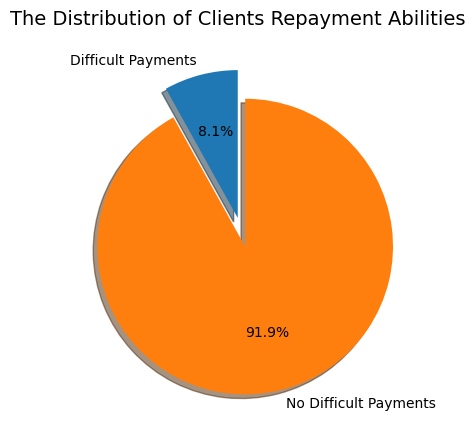

In [6]:
# Visuaize Target
train['TARGET'] = train['TARGET'].replace({1 : 'Difficult Payments', 0: 'No Difficult Payments'})

label = train['TARGET'].unique()
target = train['TARGET'].groupby(train['TARGET']).count()
explode = (0, 0.2) 

fig, ax = plt.subplots()
ax.pie(target, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('The Distribution of Clients Repayment Abilities', fontsize=14)
plt.show()

In [7]:
# Total Number of Target
train[['TARGET']].groupby(train['TARGET']).count()

,TARGET
TARGET,
Difficult Payments,24825
No Difficult Payments,282686


The target was imbalanced with 0 label is ` 282686`  compared to target with 1 label `24825` 

**Note**: This dataset is imbalanced and it does require special treatment or resampling. The resampling step will be carried out in the Data Preprocessing.

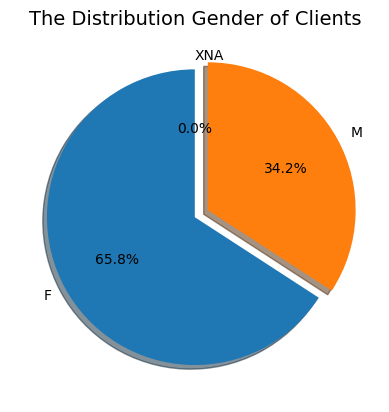

In [8]:
# Visualize gender client
labels = ['F', 'M', 'XNA']

gender = train['CODE_GENDER'].groupby(train['CODE_GENDER']).count()
gender = gender.tolist()
explode = (0, 0.1, 0, ) 

fig, ax = plt.subplots()
ax.pie(gender, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('The Distribution Gender of Clients', fontsize=14)
plt.show()

In [9]:
# Total number of gender
train[['CODE_GENDER']].groupby(train['CODE_GENDER']).count()


,CODE_GENDER
CODE_GENDER,
F,202448
M,105059
XNA,4


From the data that we have, the gender of clients is dominated by female by 65.8% with a total of 202448 followed by male 34.2% with 105059 number of client and there are 4 people whose gender is unknown. 

In [10]:
# Age group
no_age_group = train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age_group = train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

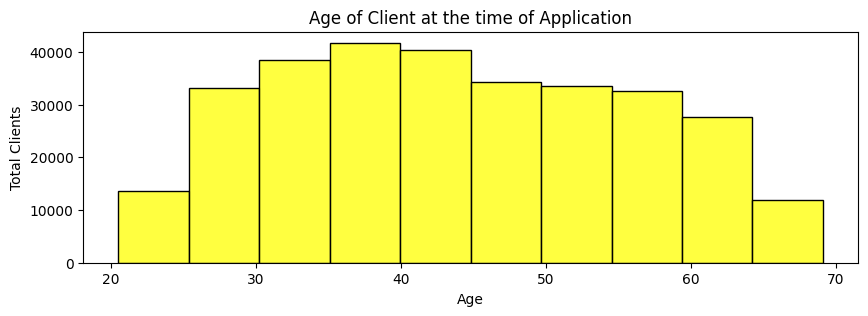

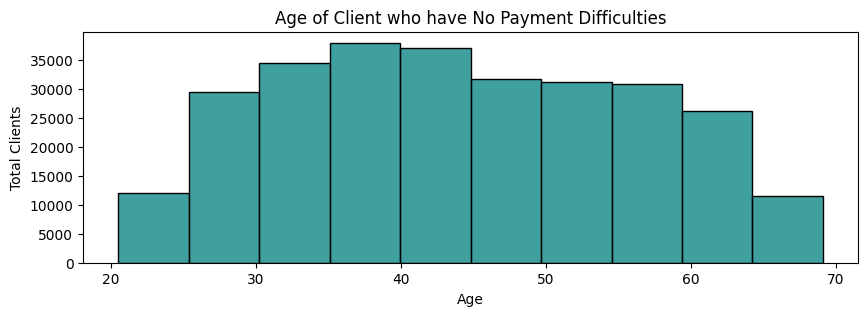

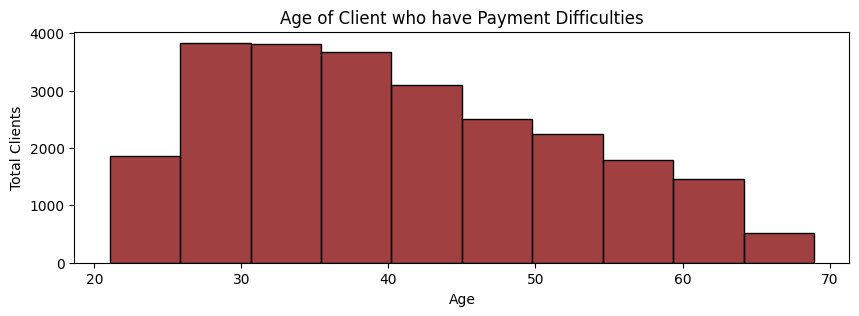

In [11]:
plt.figure(figsize=(10,3))
sns.histplot(train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='yellow')
plt.title('Age of Client at the time of Application')
plt.xlabel('Age')
plt.ylabel('Total Clients')
plt.show()

plt.figure(figsize=(10,3))
sns.histplot(no_age_group, bins=10, color='teal')
plt.title('Age of Client who have No Payment Difficulties')
plt.xlabel('Age')
plt.ylabel('Total Clients')
plt.show()

plt.figure(figsize=(10,3))
sns.histplot(yes_age_group, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client who have Payment Difficulties')
plt.xlabel('Age')
plt.ylabel('Total Clients')
plt.show()

The `majority` of loan applicants fall within the age range of 35-45 years, with the next highest number of applicants being in the 40-45 age range. On the other hand, there is a significantly low number of applicants below the age of 25 or above 65.

Within the age range of 35-45 years, a higher proportion of clients demonstrate no payment difficulties. In contrast, clients between the ages of 25-35 are more likely to experience payment difficulties.

In [12]:
print(train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count())
print('-'*100)
print(train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count())
print('-'*100)
print(train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count())
print('-'*100)
print(train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count())

  NAME_CONTRACT_TYPE                 TARGET  SK_ID_CURR
0         Cash loans     Difficult Payments       23221
1         Cash loans  No Difficult Payments      255011
2    Revolving loans     Difficult Payments        1604
3    Revolving loans  No Difficult Payments       27675
----------------------------------------------------------------------------------------------------
  CODE_GENDER                 TARGET  SK_ID_CURR
0           F     Difficult Payments       14170
1           F  No Difficult Payments      188278
2           M     Difficult Payments       10655
3           M  No Difficult Payments       94404
4         XNA  No Difficult Payments           4
----------------------------------------------------------------------------------------------------
  FLAG_OWN_CAR                 TARGET  SK_ID_CURR
0            N     Difficult Payments       17249
1            N  No Difficult Payments      185675
2            Y     Difficult Payments        7576
3            Y  No Diffi

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\397344811.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<AxesSubplot: xlabel='FLAG_OWN_REALTY', ylabel='count'>

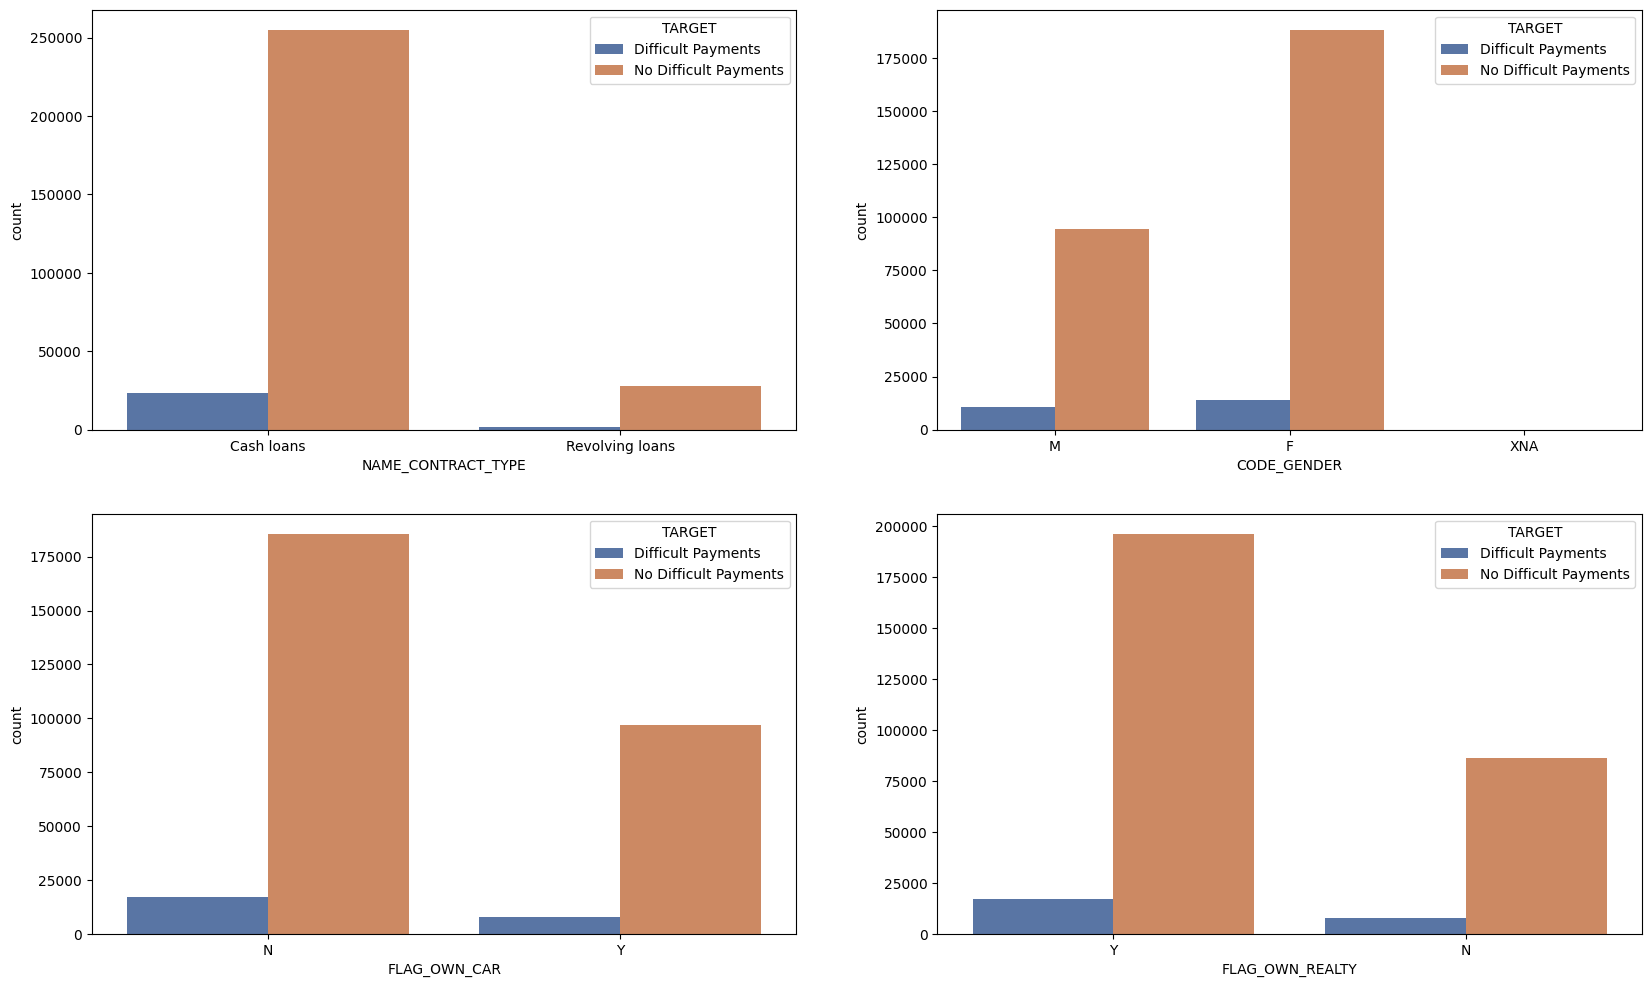

In [13]:
# Visuailize
plt.subplots(figsize=(20,12))

plt.subplot(221)
sns.countplot(train, x='NAME_CONTRACT_TYPE', hue='TARGET', palette='deep')

plt.subplot(222)
sns.countplot(train, x='CODE_GENDER', hue='TARGET', palette='deep')

plt.subplot(223)
sns.countplot(train, x='FLAG_OWN_CAR', hue='TARGET', palette='deep')

plt.subplot(224)
sns.countplot(train, x='FLAG_OWN_REALTY', hue='TARGET', palette='deep')


- `Cash loans` with around 278K loans this is majority of total loans in this dataset and the `Revolving loans` have a much lower amount of around 29K compared to cash loans.
- When viewed by car ownership, more people apply for a loan if they do not own a car. 
- and When viewed based on realty ownership, more people apply for a loan if they own realty, this happens because the loan is intended to pay for the realty.

In [14]:
train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\1182948128.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


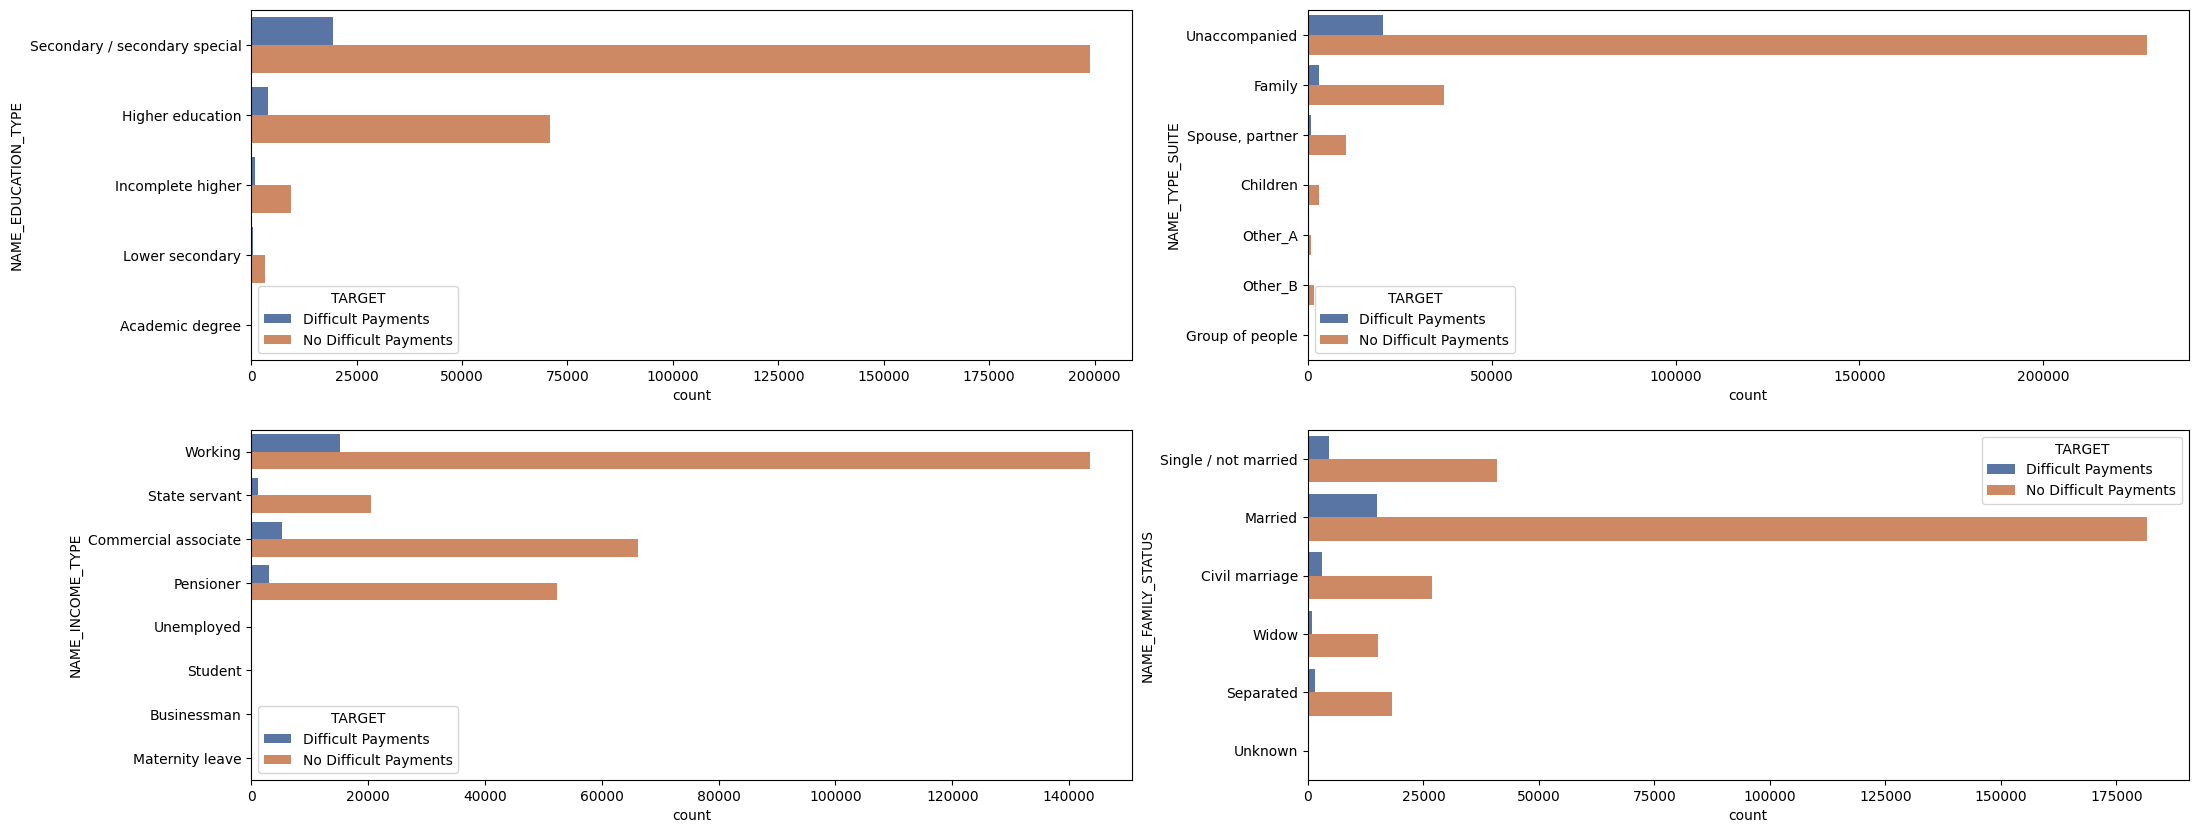

In [15]:
plt.subplots(figsize=(25,10))

plt.subplot(2,2,1)
sns.countplot(train, y='NAME_EDUCATION_TYPE', hue='TARGET', palette='deep')

plt.subplot(222)
sns.countplot(train, y='NAME_TYPE_SUITE', hue='TARGET', palette='deep')

plt.subplot(223)
sns.countplot(train, y='NAME_INCOME_TYPE', hue='TARGET', palette='deep')

plt.subplot(224)
sns.countplot(train, y='NAME_FAMILY_STATUS', hue='TARGET', palette='deep')

plt.show()

- Based on Education, most of loans comes from the Secondary Special Education followed with Higher Education, Incomplete Higher and etc.
- Based on the type of residence, the clients who make more loans are the 'unaccompanied', 'family', 'spouse, partner' categories.
- If we look through the category of income type, clients who have income from working, state servant, commercial associate and pensioner are the most borrowed clients compared to others.
- If we look at the family type, married people are almost certain to make loans compared to those who are not married. 


C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\1765254533.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(325)


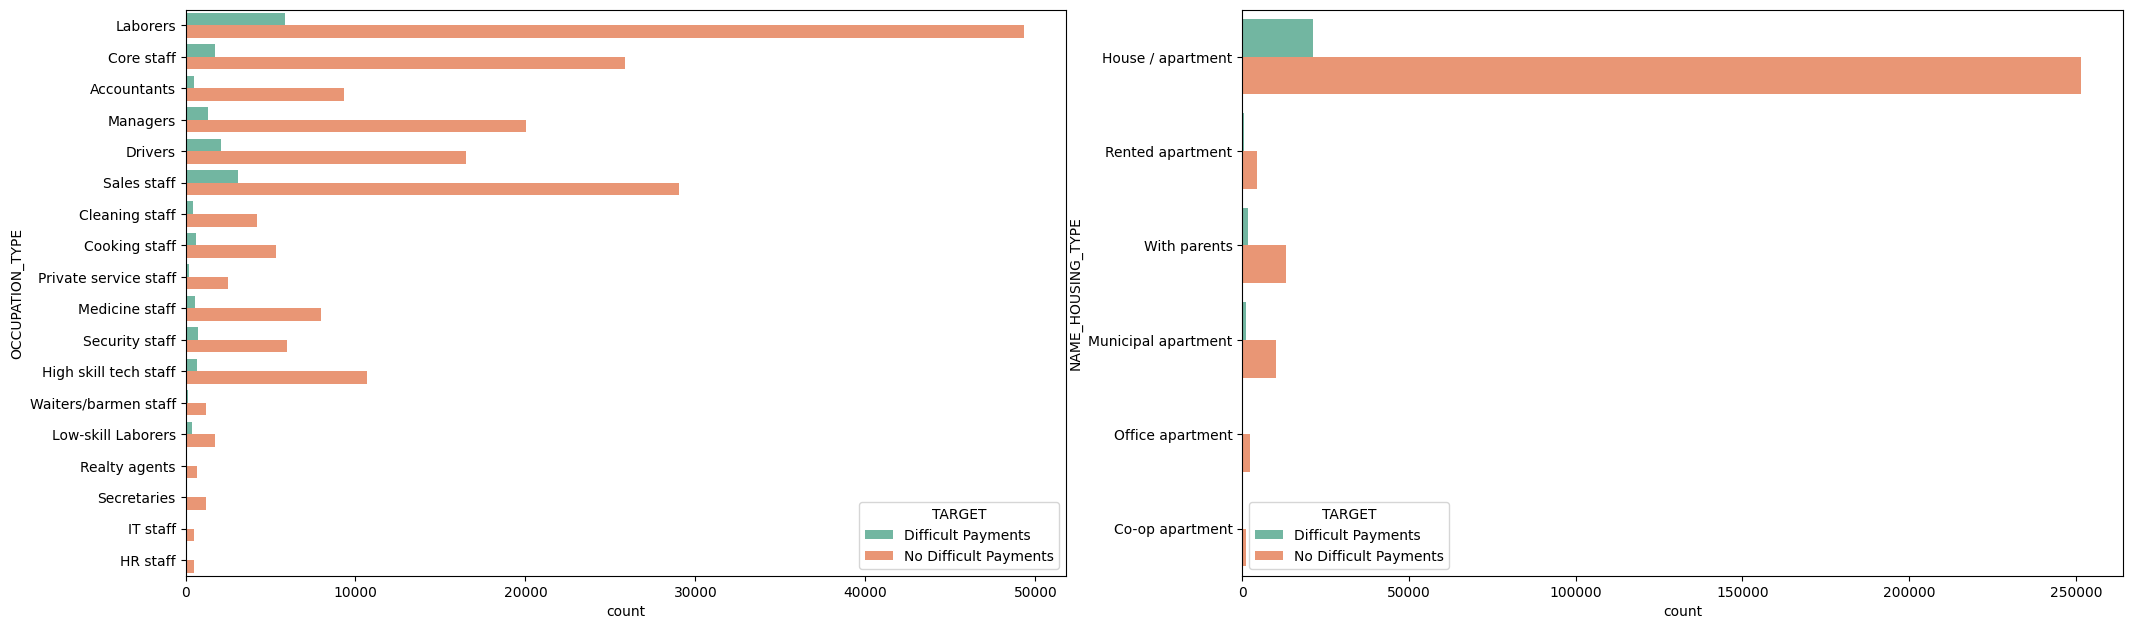

In [16]:
plt.subplots(figsize=(25,25))

plt.subplot(325)
sns.countplot(train, y='OCCUPATION_TYPE', hue='TARGET', palette='Set2')

plt.subplot(326)
sns.countplot(train, y='NAME_HOUSING_TYPE', hue='TARGET', palette='Set2')
plt.show()

- The top 5 job types that borrow the most are Laborers, Sales Staff, Core staff, Managers and Drivers.
- Clients who live in a house/apartment make loans more often than others

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\54771601.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


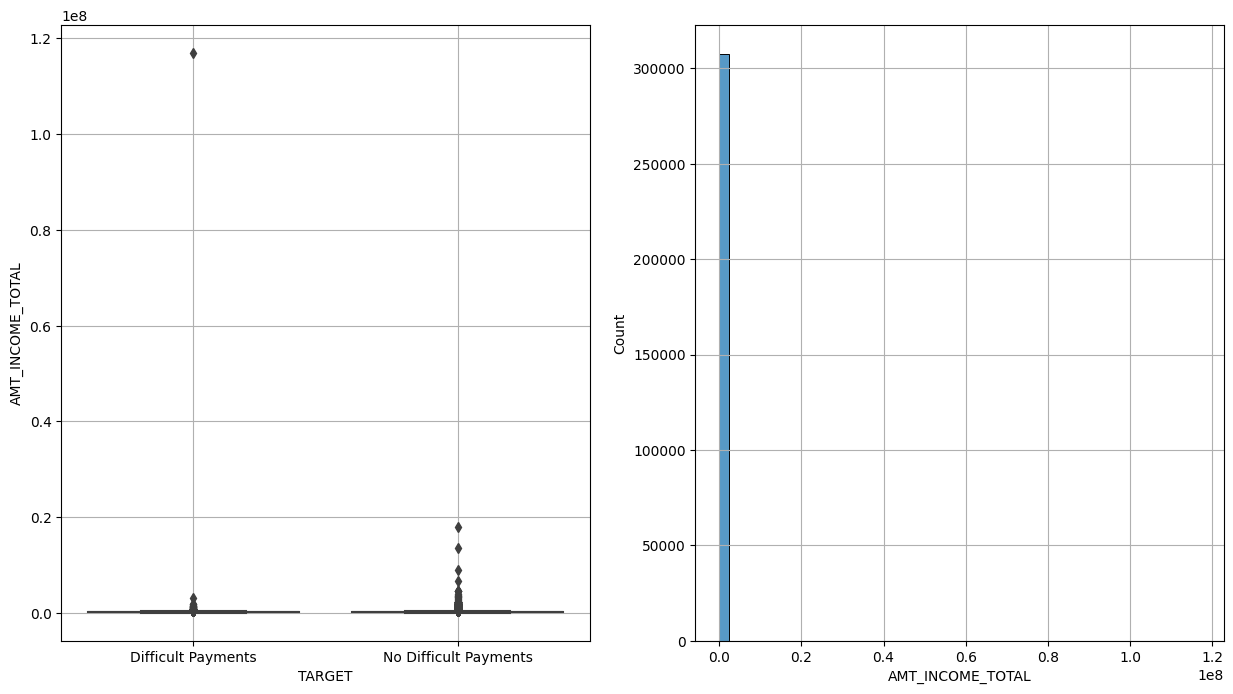

In [17]:
plt.subplots(figsize=(15,8))

plt.subplot(121)
sns.boxplot(train,x='TARGET', y='AMT_INCOME_TOTAL')
plt.grid()

plt.subplot(122)
sns.histplot(train, x='AMT_INCOME_TOTAL', bins=50)
plt.grid()

plt.show()

We can see that the AMT_INCOME_TOTAL column has very extreme outliers, especially in the DIfficult Payments target.

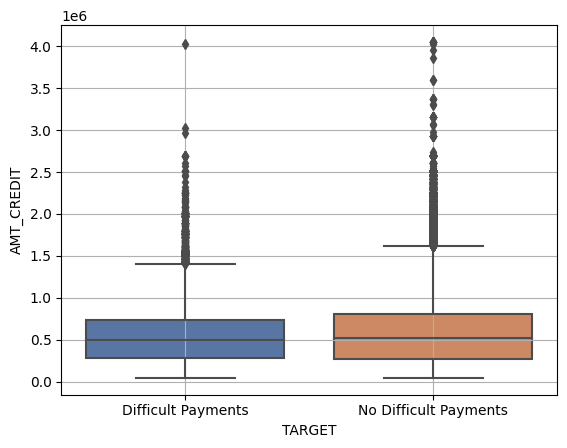

In [18]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'deep')
plt.grid()
plt.show()

# Data Preprocessing

## Check Duplicate

In [19]:
# Number of duplicate data
print('The number of duplication is:', df_train.duplicated().sum())


The number of duplication is: 0


In [20]:
# Split Data
X = df_train.drop(columns=['TARGET'])
y = df_train['TARGET']

#### Change `DAYS_BIRTH` Column to Age 

In [21]:
# Change column
age_train = pd.DataFrame(np.round_(X['DAYS_BIRTH'].values/-365), columns=['Age'])
age_df_train = age_train.astype('Int64')

X['AGE'] = age_df_train
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


#### Drop Unnecesarry Column

In [22]:
# Drop Unnecessary columns
X.drop(X.iloc[:, 43:90], inplace=True, axis=1)

X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55


In [23]:
# Cat column with many unique values
kolom = X.select_dtypes(include=['object']).columns.to_list()

for i in kolom:
    print(i)
    print(X[i].nunique())

NAME_CONTRACT_TYPE
2
CODE_GENDER
3
FLAG_OWN_CAR
2
FLAG_OWN_REALTY
2
NAME_TYPE_SUITE
7
NAME_INCOME_TYPE
8
NAME_EDUCATION_TYPE
5
NAME_FAMILY_STATUS
6
NAME_HOUSING_TYPE
6
OCCUPATION_TYPE
18
WEEKDAY_APPR_PROCESS_START
7
ORGANIZATION_TYPE
58


Organization type is the feature that has the most unique value

In [24]:
# Drop feature with many unique value

X.drop(['ORGANIZATION_TYPE','DAYS_BIRTH','SK_ID_CURR','OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)


#### Convert Negative Values to Positive Values


In [25]:
X.iloc[:,15:18] = X.iloc[:,15:18].abs()
X['DAYS_LAST_PHONE_CHANGE']= X['DAYS_LAST_PHONE_CHANGE'].abs()

## Handling Missing Values

In [26]:
# Number of missing Values
pd.set_option('display.max_rows', 500)

miss_value = pd.DataFrame(X.isnull().sum(), columns=['Total Null Values'])
miss_value.sort_values(by='Total Null Values', ascending=False)

,Total Null Values
OCCUPATION_TYPE,96391
EXT_SOURCE_3,60965
AMT_REQ_CREDIT_BUREAU_YEAR,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_HOUR,41519
NAME_TYPE_SUITE,1292
OBS_60_CNT_SOCIAL_CIRCLE,1021


#### Numeric Visualize for filling missing values

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\28357544.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


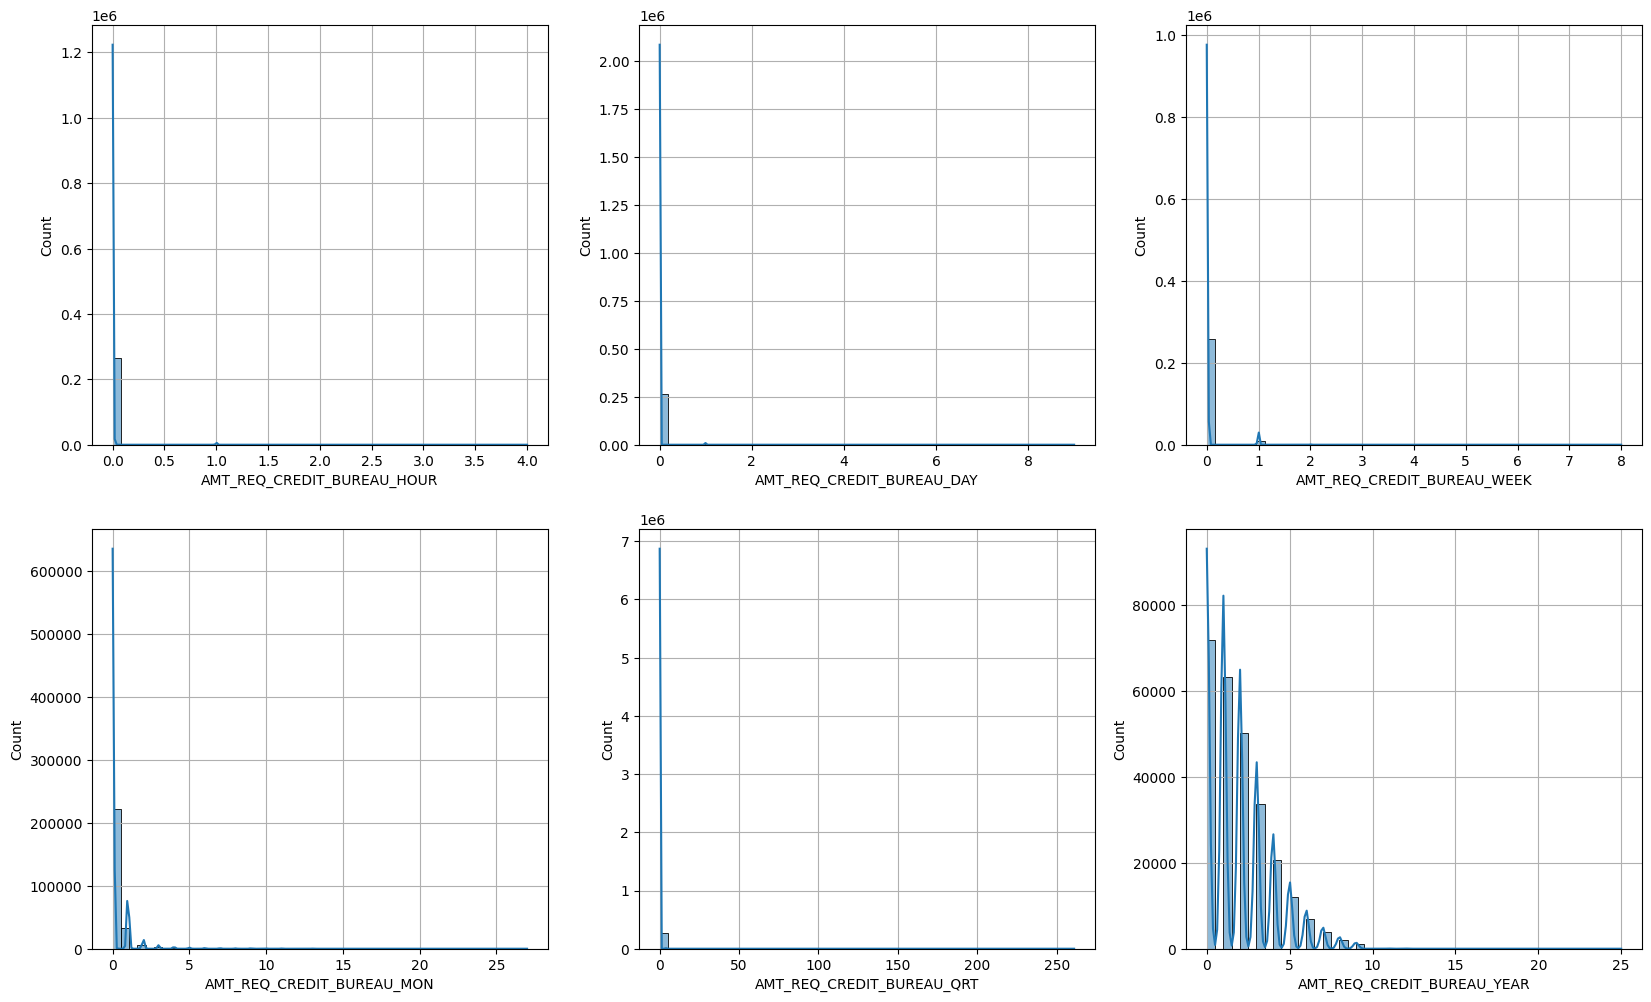

In [27]:
plt.subplots(figsize=(20,12))

plt.subplot(231)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_HOUR'], kde=True, bins=50)
plt.grid()

plt.subplot(232)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_DAY'], kde=True, bins=50)
plt.grid()

plt.subplot(233)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_WEEK'], kde=True, bins=50)
plt.grid()

plt.subplot(234)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_MON'], kde=True, bins=50)
plt.grid()

plt.subplot(235)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_QRT'], kde=True, bins=50)
plt.grid()

plt.subplot(236)
sns.histplot(X, x=X['AMT_REQ_CREDIT_BUREAU_YEAR'], kde=True, bins=50)
plt.grid()

plt.show()

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\3599609765.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


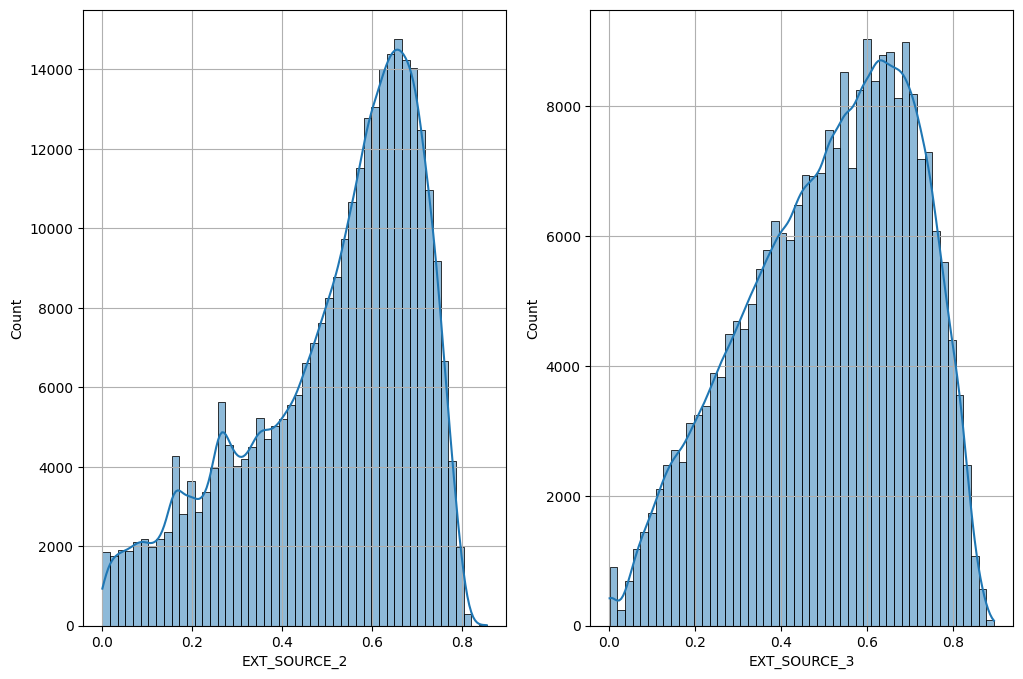

In [28]:
plt.subplots(figsize=(12,8))

plt.subplot(121)
sns.histplot(X, x=X['EXT_SOURCE_2'], kde=True, bins=50)
plt.grid()

plt.subplot(122)
sns.histplot(X, x=X['EXT_SOURCE_3'], kde=True, bins=50)
plt.grid()

plt.show()

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\4226259555.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


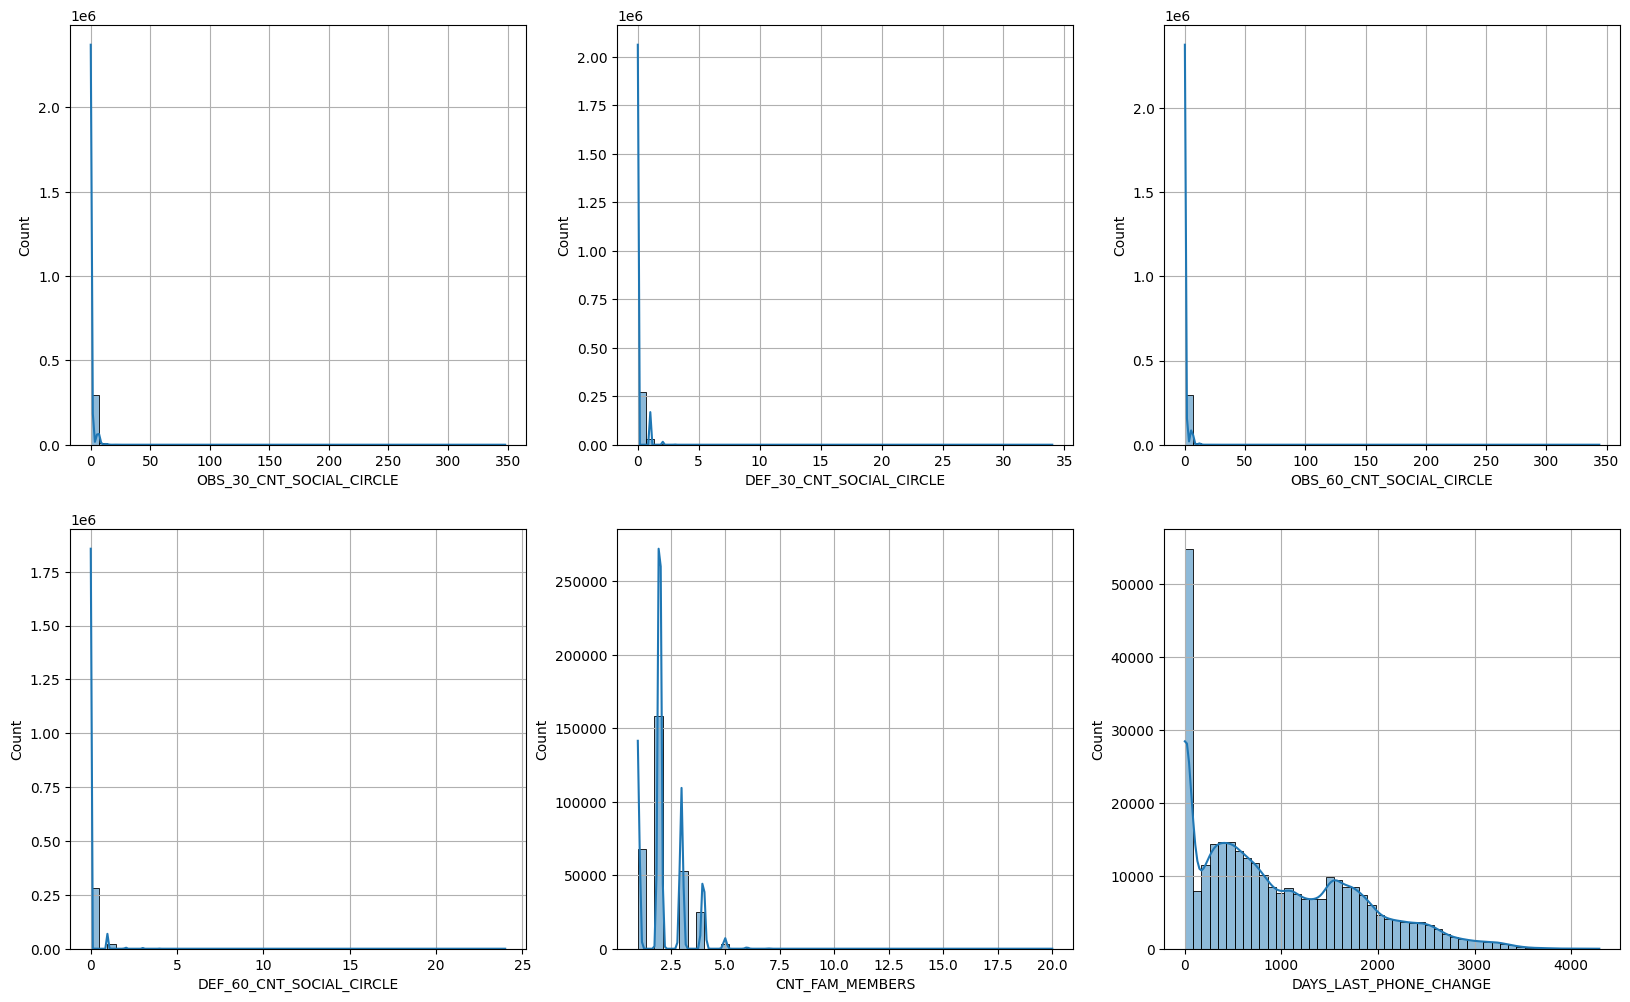

In [29]:
plt.subplots(figsize=(20,12))

plt.subplot(231)
sns.histplot(X, x=X['OBS_30_CNT_SOCIAL_CIRCLE'], kde=True, bins=50)
plt.grid()

plt.subplot(232)
sns.histplot(X, x=X['DEF_30_CNT_SOCIAL_CIRCLE'], kde=True, bins=50)
plt.grid()

plt.subplot(233)
sns.histplot(X, x=X['OBS_60_CNT_SOCIAL_CIRCLE'], kde=True, bins=50)
plt.grid()

plt.subplot(234)
sns.histplot(X, x=X['DEF_60_CNT_SOCIAL_CIRCLE'], kde=True, bins=50)
plt.grid()

plt.subplot(235)
sns.histplot(X, x=X['CNT_FAM_MEMBERS'], kde=True, bins=50)
plt.grid()

plt.subplot(236)
sns.histplot(X, x=X['DAYS_LAST_PHONE_CHANGE'], kde=True, bins=50)
plt.grid()

plt.show()

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\1814358420.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


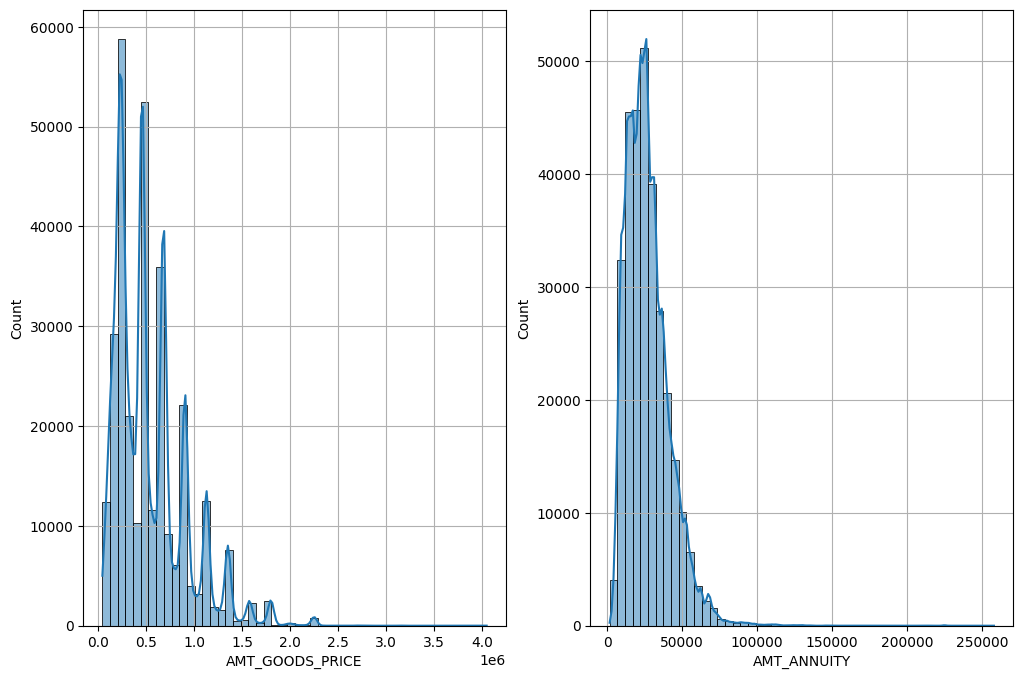

In [30]:
plt.subplots(figsize=(12,8))

plt.subplot(121)
sns.histplot(X, x=X['AMT_GOODS_PRICE'], kde=True, bins=50)
plt.grid()

plt.subplot(122)
sns.histplot(X, x=X['AMT_ANNUITY'], kde=True, bins=50)
plt.grid()

plt.show()

Distribution of all numerical features is skewed, so the missing values in those features should be imputed with the median.

#### Filling Missing Values

In [31]:
cat_columns = X.select_dtypes(include=['object']).columns.tolist()
num_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [32]:
# Imputation missing values

for column in X:
    if X[column].isnull().any():
        if(column in cat_columns):
            X[column]=X[column].fillna(X[column].mode()[0])
        else:
            X[column]=X[column].fillna(X[column].median())


In [33]:
pd.DataFrame(X.isna().sum(), columns=['Total Null Values']).sort_values(by='Total Null Values', ascending=False)

,Total Null Values
NAME_CONTRACT_TYPE,0
FLAG_DOCUMENT_3,0
FLAG_DOCUMENT_9,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_5,0
FLAG_DOCUMENT_4,0
FLAG_DOCUMENT_2,0
FLAG_DOCUMENT_11,0


## Handling IQR

#### At this stage we need to determine the reference column to remove outlier data

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\2580308615.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


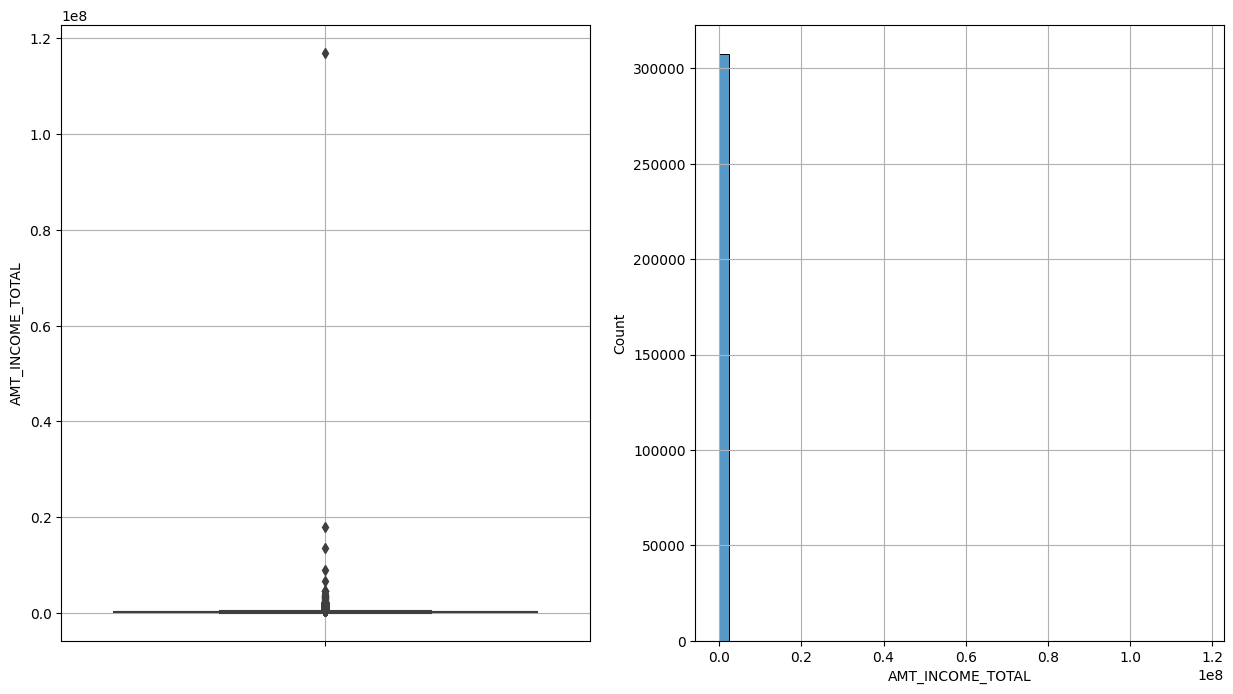

In [34]:
# AMT_INCOME distibution
plt.subplots(figsize=(15,8))

plt.subplot(121)
sns.boxplot(X, y='AMT_INCOME_TOTAL')
plt.grid()

plt.subplot(122)
sns.histplot(X, x='AMT_INCOME_TOTAL', bins=50)
plt.grid()

plt.show()

If we seen from the data distribution in the `AMT_INCOME_TOTAL` column, the data is not normally distributed so it is necessary to handle outliers using the IQR (Inter Quartile Range) method.

In [35]:
# Function for IQR
def boundaries(data, variable):    
    IQR= data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    lower_limit = data[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = data[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit

# penentuan lower limit dan upper limit
lower_limit, upper_limit = boundaries(X, 'AMT_INCOME_TOTAL')

# menghapus outlier
X_train_no_outliers = X[(X.AMT_INCOME_TOTAL > lower_limit)&(X.AMT_INCOME_TOTAL < upper_limit)] 

print(len(X))
print(f'Number of outliers in the age column: {len(X)-len(X_train_no_outliers)}')
print(f'Percentage of outliers that have been removed: { ((len(X)-len(X_train_no_outliers)) / len(X)) * 100:.2f}%')

307511
Number of outliers in the age column: 15825
Percentage of outliers that have been removed: 5.15%


In [36]:
y = y[X_train_no_outliers.index]

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\1975109282.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


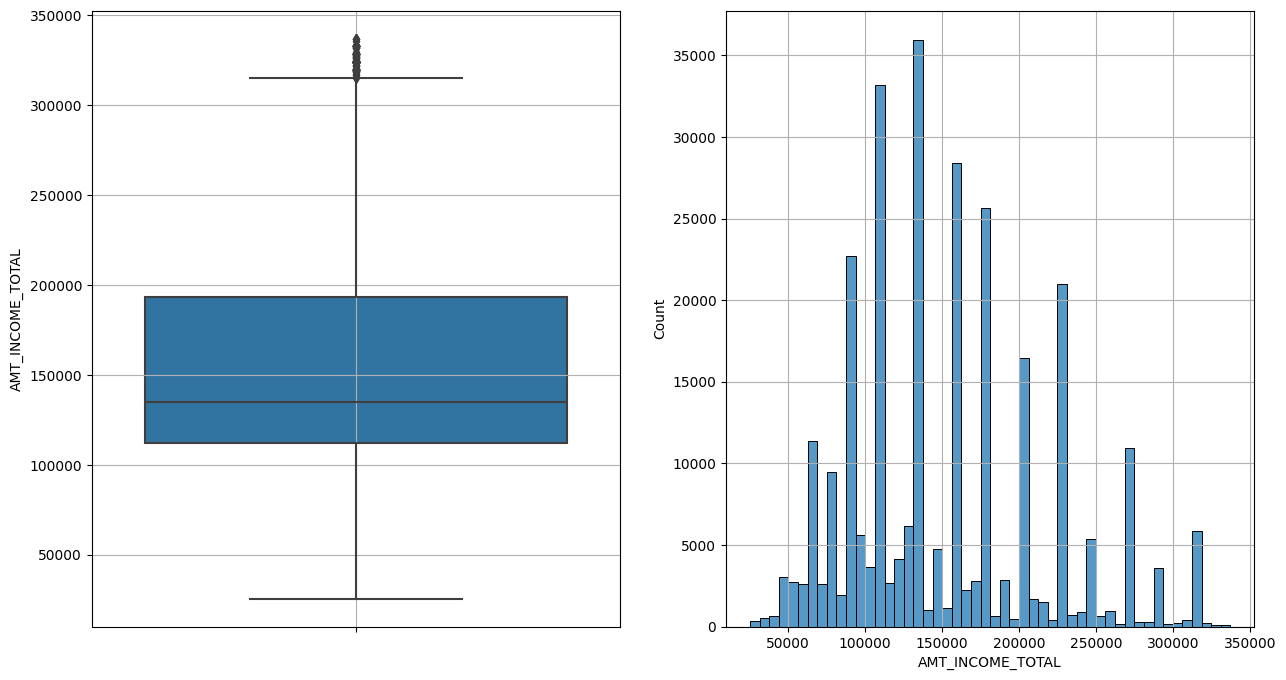

Skewness Value : 0.6023703248383754


In [37]:
# AMT_INCOME distibution
plt.subplots(figsize=(15,8))

plt.subplot(121)
sns.boxplot(X_train_no_outliers, y='AMT_INCOME_TOTAL')
plt.grid()

plt.subplot(122)
sns.histplot(X_train_no_outliers, x='AMT_INCOME_TOTAL', bins=50)
plt.grid()

plt.show()

print(f'Skewness Value : {X_train_no_outliers.AMT_INCOME_TOTAL.skew()}')

The distribution data almost normal with 0.6 skewness value, which is good because only 5% of outlier removal is done.

## Feature Selection

In [38]:
category_columns = X_train_no_outliers.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_train_no_outliers.select_dtypes(include=['int64','float64']).columns.tolist()

In [39]:
num_for_testing = X_train_no_outliers[numerical_columns]
cat_for_testing = X_train_no_outliers[category_columns]

The methods used for feature selection are ANOVA and Chi Square.

* ANOVA is used on data that has Numerical input and categorical output data.  
* Chi Square is used on data that has categorical input and categorical output data.

Features that will be taken have a P_value <= 0.05

#### ANOVA Test

In [40]:
# Numerical
anova = SelectKBest(score_func=f_classif)
anova.fit_transform(num_for_testing, y)

anova_score = pd.DataFrame({'Anova_score':anova.scores_, 'P_value_anova': anova.pvalues_}, index=num_columns )
anova_score.sort_values(by=['P_value_anova'], ascending=True)

,Anova_score,P_value_anova
AGE,1892.631015,0.000000e+00
EXT_SOURCE_2,7619.566157,0.000000e+00
EXT_SOURCE_3,7374.874941,0.000000e+00
REGION_RATING_CLIENT_W_CITY,1012.405837,8.691513e-222
REGION_RATING_CLIENT,944.206498,5.175495e-207
DAYS_LAST_PHONE_CHANGE,939.884126,4.472110e-206
DAYS_ID_PUBLISH,792.497787,3.954880e-174
REG_CITY_NOT_WORK_CITY,779.077575,3.214809e-171
DAYS_EMPLOYED,718.622732,4.155175e-158
FLAG_EMP_PHONE,688.565597,1.377008e-151


There are several features in **ANOVA TEST** that have a P-Value> than 0.05 so that the feature needs to be removed. such as `['FLAG_DOCUMENT_11', 'AMT_ANNUITY', 'FLAG_DOCUMENT_21','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_17', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_5', 'FLAG_EMAIL', 'FLAG_DOCUMENT_12','FLAG_MOBIL', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_19','FLAG_CONT_MOBILE']` 

#### Chi Square Test

In [41]:
encoder = OrdinalEncoder()
encoder.fit_transform(cat_for_testing)
cat_feature = encoder.transform(cat_for_testing)

In [42]:
chi = SelectKBest(score_func=chi2, k=2)
chi.fit_transform(cat_feature, y)

chi_score = pd.DataFrame({'Chi2_score':chi.scores_, 'P_value_chi': chi.pvalues_}, index= cat_columns )
chi_score.sort_values(by=['P_value_chi'], ascending=True)

,Chi2_score,P_value_chi
NAME_INCOME_TYPE,835.256139,1.166664e-183
CODE_GENDER,654.266190,2.638175e-144
NAME_EDUCATION_TYPE,382.391307,3.752671e-85
NAME_HOUSING_TYPE,246.825396,1.278054e-55
NAME_CONTRACT_TYPE,232.315287,1.863923e-52
OCCUPATION_TYPE,142.699695,6.837409e-33
FLAG_OWN_CAR,73.404465,1.056269e-17
NAME_TYPE_SUITE,13.974512,1.853057e-04
NAME_FAMILY_STATUS,7.055857,7.900649e-03
WEEKDAY_APPR_PROCESS_START,6.276648,1.223393e-02


There are 2 features in **CHI Squared TEST** that have a P-Value> than 0.05 that is `['WEEKDAY_APPR_PROCESS_START','NAME_FAMILY_STATUS']` so that the feature needs to be removed.

In [43]:
feature_selection_column = ['FLAG_DOCUMENT_11', 'AMT_ANNUITY', 'FLAG_DOCUMENT_21','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_17', 
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_5', 
'FLAG_EMAIL', 'FLAG_DOCUMENT_12','FLAG_MOBIL', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_19','FLAG_CONT_MOBILE','WEEKDAY_APPR_PROCESS_START','NAME_FAMILY_STATUS']

In [44]:
X_final = X_train_no_outliers.drop(columns=feature_selection_column)
X_final.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0.0,0.0,1.0,26
1,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,...,0,0,0,0,0,0,0.0,0.0,0.0,46
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0.0,0.0,0.0,52
3,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0.0,0.0,1.0,52
4,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0.0,0.0,0.0,55


In [45]:
X_final.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8

## Scalling and Encoding

In [46]:
# Seperate columns for scalling and encoding
cat_columns = X_final.select_dtypes(include=['object']).columns.tolist()
num_columns= X_final.select_dtypes(include=['int64','float64']).columns.tolist()

In [47]:
# Make a new variable
cat_train = X_final[cat_columns]
num_train = X_final[num_columns]


In [48]:
# Scalling and Encoding
scaler = MinMaxScaler()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

# fit all the data 
scaler.fit(num_train)
encoder.fit_transform(cat_train)

# Scalling and encoding
cat_feature_train = encoder.transform(cat_train)
num_feature_train = scaler.transform(num_train)

num_feature_train

array([[0.        , 0.56791908, 0.09478262, ..., 0.        , 0.04      ,
        0.10416667],
       [0.        , 0.78468208, 0.32725984, ..., 0.        , 0.        ,
        0.52083333],
       [0.        , 0.13439306, 0.02359097, ..., 0.        , 0.        ,
        0.64583333],
       ...,
       [0.        , 0.40895954, 0.16583508, ..., 0.        , 0.04      ,
        0.41666667],
       [0.        , 0.46676301, 0.08521766, ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 0.4234104 , 0.16513679, ..., 0.        , 0.04      ,
        0.52083333]])

In [49]:
# Concat 
X_concat = np.concatenate([num_feature_train, cat_feature_train],axis=1)
X_concat.shape

(291686, 51)

# Handling Imbalanced Data

<AxesSubplot: >

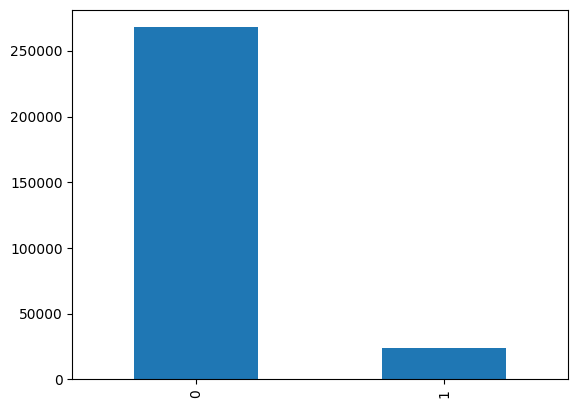

In [50]:
# Visualize target data
y.value_counts().plot(kind='bar')

In [51]:
# Resampled data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_concat, y)

<AxesSubplot: >

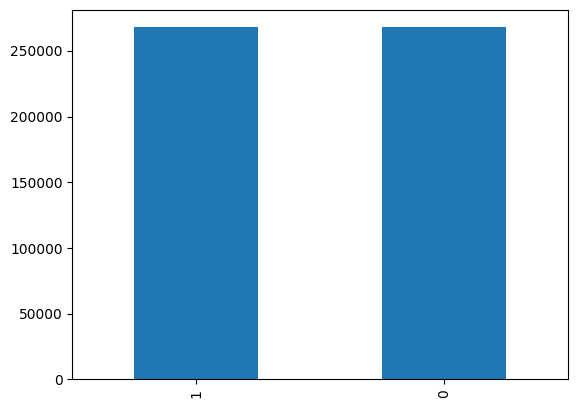

In [52]:
# After resampling
y_resampled.value_counts().plot(kind='bar')

## Splitting Data

In [53]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=77)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(428467, 51)
(107117, 51)
(428467,)
(107117,)


# Model Definition

Here are some algorithms that will be tested to determine the best model:
1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest


#### 1. Logistic Regression

In [54]:
# train the model
log_model = LogisticRegression()

log_model.fit(X_train, y_train)


c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# predict data train
y_train_pred_log = log_model.predict(X_train)
target_names = ['No payment Difficult', 'Payment Difficult']
# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log, target_names=target_names))

Classification Report Training Model (Logistic Regression):
                      precision    recall  f1-score   support

No payment Difficult       0.68      0.69      0.68    214164
   Payment Difficult       0.69      0.68      0.68    214303

            accuracy                           0.68    428467
           macro avg       0.68      0.68      0.68    428467
        weighted avg       0.68      0.68      0.68    428467



In [56]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log, target_names=target_names))

Classification Report Testing Model (Logistic Regression):
                      precision    recall  f1-score   support

No payment Difficult       0.68      0.69      0.69     53628
   Payment Difficult       0.68      0.68      0.68     53489

            accuracy                           0.68    107117
           macro avg       0.68      0.68      0.68    107117
        weighted avg       0.68      0.68      0.68    107117



In [57]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

Training Accuracy: % 68.46
Test Accuracy: % 68.35
ROC AUC: 0.6835


#### Naive Bayes

In [58]:
# train the model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [59]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb, target_names=target_names))

Classification Report Training Model (Naive Bayes):
                      precision    recall  f1-score   support

No payment Difficult       0.73      0.28      0.40    214164
   Payment Difficult       0.55      0.90      0.69    214303

            accuracy                           0.59    428467
           macro avg       0.64      0.59      0.54    428467
        weighted avg       0.64      0.59      0.54    428467



In [60]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb, target_names=target_names))

Classification Report Testing Model (Naive Bayes):
                      precision    recall  f1-score   support

No payment Difficult       0.73      0.28      0.40     53628
   Payment Difficult       0.55      0.90      0.69     53489

            accuracy                           0.59    107117
           macro avg       0.64      0.59      0.54    107117
        weighted avg       0.64      0.59      0.54    107117



In [61]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_gnb_train))
print("Test Accuracy: % {}".format(acc_gnb_test))

# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_log)

Training Accuracy: % 58.85
Test Accuracy: % 58.79
ROC AUC: 0.5883


#### 3. Decision Tree

In [62]:
# train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [63]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt, target_names=target_names))

Classification Report Training Model (Decision Tree):
                      precision    recall  f1-score   support

No payment Difficult       1.00      1.00      1.00    214164
   Payment Difficult       1.00      1.00      1.00    214303

            accuracy                           1.00    428467
           macro avg       1.00      1.00      1.00    428467
        weighted avg       1.00      1.00      1.00    428467



In [64]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt, target_names=target_names))

Classification Report Testing Model (Decision Tree):
                      precision    recall  f1-score   support

No payment Difficult       0.91      0.89      0.90     53628
   Payment Difficult       0.89      0.91      0.90     53489

            accuracy                           0.90    107117
           macro avg       0.90      0.90      0.90    107117
        weighted avg       0.90      0.90      0.90    107117



In [65]:
print(f'Train Accuracy: {round(dt_model.score(X_train,y_train)*100,2)}')
print(f'Test Accuracy: {round(dt_model.score(X_test,y_test)*100,2)}')
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_log)

Train Accuracy: 100.0
Test Accuracy: 90.3
ROC AUC: 0.903


#### 4. Random Forest

In [66]:
# train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [67]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest)')
print(classification_report(y_train, y_train_pred_rf, target_names=target_names))

Classification Report Training Model (Random Forest)
                      precision    recall  f1-score   support

No payment Difficult       1.00      1.00      1.00    214164
   Payment Difficult       1.00      1.00      1.00    214303

            accuracy                           1.00    428467
           macro avg       1.00      1.00      1.00    428467
        weighted avg       1.00      1.00      1.00    428467



In [68]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))

Classification Report Testing Model (Random Forest):
                      precision    recall  f1-score   support

No payment Difficult       0.92      1.00      0.96     53628
   Payment Difficult       1.00      0.91      0.95     53489

            accuracy                           0.95    107117
           macro avg       0.96      0.95      0.95    107117
        weighted avg       0.96      0.95      0.95    107117



In [69]:
print(f'Train Accuracy: {round(rf_model.score(X_train,y_train)*100,2)}')
print(f'Test Accuracy: {round(rf_model.score(X_test,y_test)*100,2)}')
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_log)

Train Accuracy: 100.0
Test Accuracy: 95.3
ROC AUC: 0.9529


### Score

In [70]:
# melihat hasil metriks pada saat parameter default
score_metrics = {}
score_train = {
    'Logistic Regression' : round(log_model.score(X_train,y_train)*100,2),
    'Gaussian Naive Bayes' : round(gnb_model.score(X_train,y_train)*100,2),
    'Decision Tree' : round(dt_model.score(X_train,y_train)*100,2),
    'Random Forest' : round(rf_model.score(X_train,y_train)*100,2)
}
score_metrics['Train_Accuration'] = score_train
a = pd.DataFrame(score_metrics)


In [71]:
score_test = {
    'Logistic Regression' : round(log_model.score(X_test,y_test)*100,2),
    'Gaussian Naive Bayes' : round(gnb_model.score(X_test,y_test)*100,2),
    'Decision Tree' : round(dt_model.score(X_test,y_test)*100,2),
    'Random Forest' : round(rf_model.score(X_test,y_test)*100,2)
}
score_metrics['Test_Accuration'] = score_test
b = pd.DataFrame(score_metrics)

In [72]:
roc_test = {
    'Logistic Regression' : roc_auc_score(y_test, y_test_pred_log),
    'Gaussian Naive Bayes' : roc_auc_score(y_test, y_test_pred_gnb),
    'Decision Tree' : roc_auc_score(y_test, y_test_pred_dt),
    'Random Forest' : roc_auc_score(y_test, y_test_pred_rf)
}
score_metrics['ROC AUC'] = roc_test
score_df = pd.DataFrame(score_metrics)
score_df.sort_values(by=['Train_Accuration','Test_Accuration'], ascending=False)

,Train_Accuration,Test_Accuration,ROC AUC
Random Forest,100.00,95.30,0.952908
Decision Tree,100.00,90.30,0.903008
Logistic Regression,68.46,68.35,0.683462
Gaussian Naive Bayes,58.85,58.79,0.588338


From the above metrics values and classification report testing Random Forest is the best algorithm model compared to the other 3 algorithms with a test **Accuracy** value of 95.30% and a **ROC AUC** value of 0.952.

In addition, if seen from the classification report value, the **Precision** value of random forest is 0.92 and the **Recall** value is 0.91, this shows that the model is very good at predicting class 0: No difficult Payment and class 1: Difficult Payment

#### Feature Importance

C:\Users\Muhammad Julizar\AppData\Local\Temp\ipykernel_15256\3451971055.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


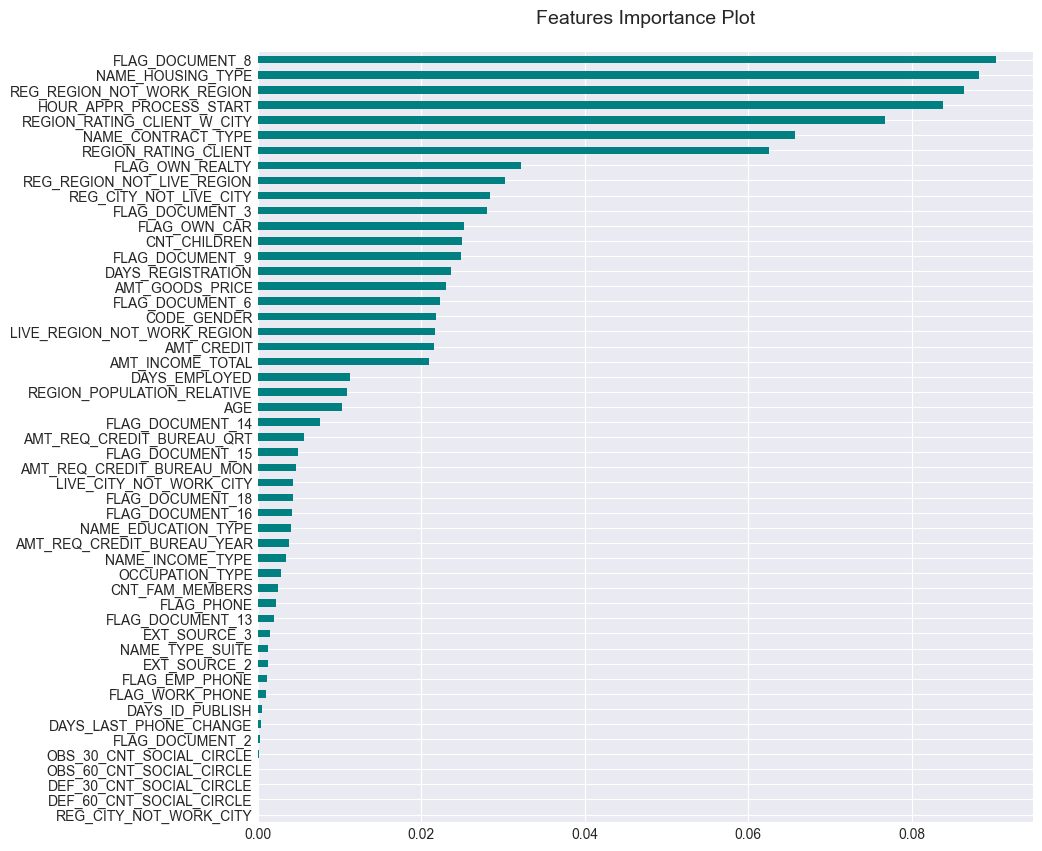

In [73]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index= X_final.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

The top 5 most importance Feature who impact the result is `FLAG_DOCUMENT_8, NAME_HOUSING_TYPE, REG_REGION_NOT_WORK_REGION, HOUR_APPR_PROCESS_START, REGION_RATING_CLIENT_W_CITY`

# Import Dataset Validation

In [74]:
df = pd.read_csv('D:\Learn a New Thing\Rakamin\Final project\home-credit-default-risk\Application_test.csv')
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

# Data preprocessing

In [76]:
df_id = df[['SK_ID_CURR']]
df_id

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038
...,...
48739,456221
48740,456222
48741,456223
48742,456224


In [77]:
df.duplicated().sum()

0

In [78]:
pd.DataFrame(df.isnull().sum(), columns=['Total Null Values']).sort_values(by=['Total Null Values'], ascending=False)

,Total Null Values
COMMONAREA_AVG,33495
COMMONAREA_MODE,33495
COMMONAREA_MEDI,33495
NONLIVINGAPARTMENTS_AVG,33347
NONLIVINGAPARTMENTS_MODE,33347
NONLIVINGAPARTMENTS_MEDI,33347
FONDKAPREMONT_MODE,32797
LIVINGAPARTMENTS_AVG,32780
LIVINGAPARTMENTS_MODE,32780
LIVINGAPARTMENTS_MEDI,32780


In [79]:
# drop features that have large number of missing values (± 50%)

df.drop(df.iloc[:, 43:90], inplace=True, axis=1)
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Cat column with many unique values
kolom = df.select_dtypes(include=['object']).columns.to_list()

for i in kolom:
    print(i)
    print(df[i].nunique())

NAME_CONTRACT_TYPE
2
CODE_GENDER
2
FLAG_OWN_CAR
2
FLAG_OWN_REALTY
2
NAME_TYPE_SUITE
7
NAME_INCOME_TYPE
7
NAME_EDUCATION_TYPE
5
NAME_FAMILY_STATUS
5
NAME_HOUSING_TYPE
6
OCCUPATION_TYPE
18
WEEKDAY_APPR_PROCESS_START
7
ORGANIZATION_TYPE
58


In [81]:
df.drop(['ORGANIZATION_TYPE','SK_ID_CURR','OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)


## Handling Missing Values

In [82]:
# imput missing values
category_columns = df.select_dtypes(include=['object']).columns.tolist()
integer_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in category_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [83]:
# After imputation
pd.DataFrame(df.isnull().sum(), columns=['Total Null Values']).sort_values(by=['Total Null Values'], ascending=False)

,Total Null Values
NAME_CONTRACT_TYPE,0
FLAG_DOCUMENT_2,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_5,0
FLAG_DOCUMENT_4,0
FLAG_DOCUMENT_3,0
DAYS_LAST_PHONE_CHANGE,0
FLAG_DOCUMENT_10,0


In [84]:
df_fix =df.drop(columns=feature_selection_column)
df_fix.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,450000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,180000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,630000.0,Unaccompanied,Working,...,1,0,0,0,0,0,0,0.0,1.0,4.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,1575000.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0.0,0.0,3.0
4,Cash loans,M,Y,N,1,180000.0,625500.0,625500.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0.0,0.0,2.0
5,Cash loans,F,Y,Y,0,270000.0,959688.0,810000.0,Unaccompanied,State servant,...,1,0,0,0,0,0,0,0.0,1.0,2.0
6,Cash loans,M,Y,Y,2,180000.0,499221.0,373500.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0.0,0.0,1.0
7,Cash loans,M,N,Y,0,166500.0,180000.0,180000.0,Unaccompanied,Working,...,1,0,0,0,0,0,0,0.0,0.0,2.0
8,Cash loans,F,N,Y,0,315000.0,364896.0,315000.0,Unaccompanied,State servant,...,0,0,0,0,0,0,0,0.0,0.0,5.0
9,Cash loans,F,Y,Y,1,162000.0,45000.0,45000.0,Family,Working,...,0,0,0,0,0,0,0,0.0,0.0,2.0


In [85]:
df_fix.iloc[:,13:17] = df_fix.iloc[:,13:17].abs()
df_fix['DAYS_LAST_PHONE_CHANGE'] = df_fix['DAYS_LAST_PHONE_CHANGE'].abs()

## Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

column_encode = df_fix.select_dtypes(include=['object']).columns.tolist()
df_fix[column_encode] = df_fix[column_encode].apply(LabelEncoder().fit_transform)
df_fix.head(10)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,1,0,135000.0,568800.0,450000.0,6,6,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,0,1,0,1,0,99000.0,222768.0,180000.0,6,6,...,0,0,0,0,0,0,0,0.0,0.0,3.0
2,0,1,1,1,0,202500.0,663264.0,630000.0,6,6,...,1,0,0,0,0,0,0,0.0,1.0,4.0
3,0,0,0,1,2,315000.0,1575000.0,1575000.0,6,6,...,0,0,0,0,0,0,0,0.0,0.0,3.0
4,0,1,1,0,1,180000.0,625500.0,625500.0,6,6,...,0,0,0,0,0,0,0,0.0,0.0,2.0
5,0,0,1,1,0,270000.0,959688.0,810000.0,6,3,...,1,0,0,0,0,0,0,0.0,1.0,2.0
6,0,1,1,1,2,180000.0,499221.0,373500.0,6,6,...,0,0,0,0,0,0,0,0.0,0.0,1.0
7,0,1,0,1,0,166500.0,180000.0,180000.0,6,6,...,1,0,0,0,0,0,0,0.0,0.0,2.0
8,0,0,0,1,0,315000.0,364896.0,315000.0,6,3,...,0,0,0,0,0,0,0,0.0,0.0,5.0
9,0,0,1,1,1,162000.0,45000.0,45000.0,1,6,...,0,0,0,0,0,0,0,0.0,0.0,2.0


In [87]:
# predict use Random Forest
predict = pd.Series(rf_model.predict(df_fix), name = "TARGET").astype(int)
results = pd.concat([df_id['SK_ID_CURR'], predict],axis = 1)
results.to_csv("application_predict.csv", index = False)


c:\Users\Muhammad Julizar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [88]:
results['TARGET'].value_counts()

0    47910
1      834
Name: TARGET, dtype: int64

In [89]:
df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

# Conclusion 

Random Forest Algorithm is the best algorithm model among Logistic Regression, Gaussian Naive Bayes and Decision Tree that can be used to predict customers who are able to make repayments so that they are not rejected when applying for a loan.

Random Forest is the best algorithm model with a test **Accuracy** value of 95.30% and a **ROC AUC** value of 0.952. which means from a total of 48609 people who have no difficult payment in `application_test` we only have a risk of misprediction of 4.7% prediction error which is very good if the machine learning is implemented.


## Business Recommendation 

By looking at the data, the characteristics of clients who make more loans with `no difficult payment` are clients **between 35-45 years old, have a place to live, have higher education, have a job, and are married**, we can create more campaigns with these characteristics.

From this historical data, companies consider offering various types of loans that suit customer needs and preferences. For example, personal loans, business loans, or property loans. By providing a variety of options, the company can reach a wider market segment and cater to the needs of diverse customers.

